# Create crossval tables

This notebook is dedicated to create the cv table to all tunings produced during 2020 for tracking purpose.


In [1]:
from kolmov import crossval_table, get_color_fader
import numpy as np
import pandas as pd
import collections
import os
import matplotlib
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

Welcome to JupyROOT 6.23/01
Using all sub packages with ROOT dependence


In [2]:
def create_op_dict(op):
    d = {
              op+'_pd_ref'    : "reference/"+op+"_cutbased/pd_ref#0",
              op+'_fa_ref'    : "reference/"+op+"_cutbased/fa_ref#0",
              op+'_sp_ref'    : "reference/"+op+"_cutbased/sp_ref",
              op+'_pd_val'    : "reference/"+op+"_cutbased/pd_val#0",
              op+'_fa_val'    : "reference/"+op+"_cutbased/fa_val#0",
              op+'_sp_val'    : "reference/"+op+"_cutbased/sp_val",
              op+'_pd_op'     : "reference/"+op+"_cutbased/pd_op#0",
              op+'_fa_op'     : "reference/"+op+"_cutbased/fa_op#0",
              op+'_sp_op'     : "reference/"+op+"_cutbased/sp_op",

              # Counts
              op+'_pd_ref_passed'    : "reference/"+op+"_cutbased/pd_ref#1",
              op+'_fa_ref_passed'    : "reference/"+op+"_cutbased/fa_ref#1",
              op+'_pd_ref_total'     : "reference/"+op+"_cutbased/pd_ref#2",
              op+'_fa_ref_total'     : "reference/"+op+"_cutbased/fa_ref#2",
              op+'_pd_val_passed'    : "reference/"+op+"_cutbased/pd_val#1",
              op+'_fa_val_passed'    : "reference/"+op+"_cutbased/fa_val#1",
              op+'_pd_val_total'     : "reference/"+op+"_cutbased/pd_val#2",
              op+'_fa_val_total'     : "reference/"+op+"_cutbased/fa_val#2",
              op+'_pd_op_passed'     : "reference/"+op+"_cutbased/pd_op#1",
              op+'_fa_op_passed'     : "reference/"+op+"_cutbased/fa_op#1",
              op+'_pd_op_total'      : "reference/"+op+"_cutbased/pd_op#2",
              op+'_fa_op_total'      : "reference/"+op+"_cutbased/fa_op#2",
    }
    return d

tuned_info = collections.OrderedDict( {
              # validation
              "max_sp_val"      : 'summary/max_sp_val',
              "max_sp_pd_val"   : 'summary/max_sp_pd_val#0',
              "max_sp_fa_val"   : 'summary/max_sp_fa_val#0',
              # Operation
              "max_sp_op"       : 'summary/max_sp_op',
              "max_sp_pd_op"    : 'summary/max_sp_pd_op#0',
              "max_sp_fa_op"    : 'summary/max_sp_fa_op#0',
              } )

tuned_info.update(create_op_dict('tight'))
tuned_info.update(create_op_dict('medium'))
tuned_info.update(create_op_dict('loose'))
tuned_info.update(create_op_dict('vloose'))

In [3]:
etbins = [15, 20, 30, 40, 50, 1000000]
etabins = [0.0, 0.8, 1.37, 1.54, 2.37, 2.50]

## 1) Reading all tunings:


In [4]:
cv_v7  = crossval_table( tuned_info, etbins = etbins , etabins = etabins )
cv_v8  = crossval_table( tuned_info, etbins = etbins , etabins = etabins )
cv_v9  = crossval_table( tuned_info, etbins = etbins , etabins = etabins )
cv_v10 = crossval_table( tuned_info, etbins = etbins , etabins = etabins )
cv_v11 = crossval_table( tuned_info, etbins = etbins , etabins = etabins )
cv_v1_el = crossval_table( tuned_info, etbins = etbins , etabins = etabins )
cv_v2_el = crossval_table( tuned_info, etbins = etbins , etabins = etabins )

In [5]:
# just for comparison
cv_v7.fill(  '/Volumes/castor/tuning_data/Zee/v7/*.r0/*/*.gz', 'v7')
cv_v8.fill(  '/Volumes/castor/tuning_data/Zee/v8/*.r0/*/*.gz', 'v8')
# new tuning
cv_v9.fill(  '/Volumes/castor/tuning_data/Zee/v9/*.v9_et*.r0/*/*.gz', 'v9')
cv_v10.fill( '/Volumes/castor/tuning_data/Zee/v10/*.r2/*/*.gz', 'v10') # select r2 reco version
cv_v11.fill( '/Volumes/castor/tuning_data/Zee/v11/*.r3/*/*.gz', 'v11') 
#cv_v1_el.fill( '/Volumes/castor/tuning_data/Zee/v1_el/*.r0/*/*.gz', 'v1-el')
cv_v2_el.fill( '/Volumes/castor/tuning_data/Zee/v2_el/*.r0/*/*.gz', 'v2-el') 

2020-12-28 00:40:36,243 | Py.crossval_table                       INFO Reading file for v7 tag from /Volumes/castor/tuning_data/Zee/v7/*.r0/*/*.gz
2020-12-28 00:40:36,244 | Py.crossval_table                       INFO There are 2500 files for this task...
2020-12-28 00:40:36,244 | Py.crossval_table                       INFO Filling the table... 
2020-12-28 00:41:41,844 | Py.crossval_table                       INFO End of fill step, a pandas DataFrame was created...
2020-12-28 00:41:42,627 | Py.crossval_table                       INFO Reading file for v8 tag from /Volumes/castor/tuning_data/Zee/v8/*.r0/*/*.gz
2020-12-28 00:41:42,627 | Py.crossval_table                       INFO There are 2500 files for this task...
2020-12-28 00:41:42,628 | Py.crossval_table                       INFO Filling the table... 
2020-12-28 00:45:30,723 | Py.crossval_table                       INFO End of fill step, a pandas DataFrame was created...
2020-12-28 00:45:31,274 | Py.crossval_table             

In [27]:
cv_v7.to_csv('table_v7.csv')
cv_v8.to_csv('table_v8.csv')
cv_v9.to_csv('table_v9.csv')
cv_v10.to_csv('table_v10.csv')
cv_v11.to_csv('table_v11.csv')
#cv_v1_el.to_csv('table_v1_el.csv')
cv_v2_el.to_csv('table_v2_el.csv')

**NOTE** Use the cell below to rerun all tables from the csv file.

In [7]:
cv_v7.from_csv('table_v7.csv')
cv_v8.from_csv('table_v8.csv')
cv_v9.from_csv('table_v9.csv')
cv_v10.from_csv('table_v10.csv')
cv_v11.from_csv('table_v11.csv')
#cv_v1_el.from_csv('table_v1_el.csv')
cv_v2_el.from_csv('table_v2_el.csv')

**WARNING**: The next cell will fix all counts from v7 tuning since these files used monte carlo samples and the other tunings used data samples. Since I would like to compare v7 (mc) with others (data), it is mandatory to fix the internal counts to make a fair comparison.

In [8]:
def fix_counts( table_orig, table_as_ref):
    dataframe = collections.OrderedDict({})
    for key in table_orig.columns:
        dataframe[key] = []
        
    for idx, row in table_orig.iterrows():
        current_table = table_as_ref.loc[(table_as_ref.et_bin==row['et_bin'])&(table_as_ref.eta_bin==row['eta_bin'])]
        for key in table_orig.columns:
            if 'total' in key:
                dataframe[key].append(current_table[key].values[0])
            elif 'passed' in key:
                total=current_table[key.replace('passed','total')].values[0]
                passed=total*row[key.replace('_passed','')]
                dataframe[key].append(passed)
            else:
                dataframe[key].append(row[key])
    return pd.DataFrame(dataframe)

cv_v7.set_table( fix_counts(cv_v7.table(), cv_v8.table() ) )

### 1.1) Get best inits and sorts:

In [9]:
best_inits_v7 = cv_v7.filter_inits("max_sp_val")
best_inits_v7 = best_inits_v7.loc[best_inits_v7.model_idx==3]
best_sorts_v7 = cv_v7.filter_sorts( best_inits_v7 , 'max_sp_op')

In [10]:
best_inits_v8 = cv_v8.filter_inits("max_sp_val")
best_sorts_v8 = cv_v8.filter_sorts( best_inits_v8 , 'max_sp_op')
best_inits_v8 = best_inits_v8.loc[best_inits_v8.model_idx==3]

In [11]:
best_inits_v9 = cv_v9.filter_inits("max_sp_val")
best_sorts_v9 = cv_v9.filter_sorts( best_inits_v9 , 'max_sp_op')

In [12]:
best_inits_v10 = cv_v10.filter_inits("max_sp_val")
best_sorts_v10 = cv_v10.filter_sorts( best_inits_v10 , 'max_sp_op')

In [13]:
best_inits_v11 = cv_v11.filter_inits("max_sp_val")
best_sorts_v11 = cv_v11.filter_sorts( best_inits_v11 , 'max_sp_op')

In [14]:
best_inits_v2_el = cv_v2_el.filter_inits("max_sp_val")
best_sorts_v2_el = cv_v2_el.filter_sorts( best_inits_v2_el , 'max_sp_op')

In [15]:
best_inits = pd.concat([
                        best_inits_v7,
                        best_inits_v8,
                        best_inits_v9,
                        best_inits_v10,
                        best_inits_v11,
                        #best_inits_v1_el,
                        best_inits_v2_el,
                       ])
best_sorts = pd.concat([
                        best_sorts_v7,
                        best_sorts_v8,
                        best_sorts_v9,
                        best_sorts_v10,
                        best_sorts_v11,
                        #best_sorts_v1_el,
                        best_sorts_v2_el,
                       ])

### 1.2) Make the table:

In [ ]:
for op in ['tight','medium','loose','vloose']:
    cv_v7.dump_beamer_table( best_inits ,  [op], 'tuning_v7_to_v2_el_'+op, 
                             title = op+' Tunings (v7 to v2-el)', 
                             tags = ['v7','v8','v9','v10','v11','v2-el']
                             #tags = ['v10']
                           )

### 1.3) Plot training curves:

In [ ]:
cv_v7.plot_training_curves( best_inits_v7, best_sorts_v7 , 'v7' )

In [ ]:
cv_v8.plot_training_curves( best_inits_v8, best_sorts_v8 , 'v8' )

In [ ]:
cv_v9.plot_training_curves( best_inits_v9, best_sorts_v9 , 'v9' )

In [ ]:
cv_v10.plot_training_curves( best_inits_v10, best_sorts_v10 , 'v10' )

In [ ]:
cv_v11.plot_training_curves( best_inits_v11, best_sorts_v11 , 'v11' )

In [ ]:
#cv_v1_el.plot_training_curves( best_inits_v1_el, best_sorts_v1_el , 'v1-el' )

In [ ]:
cv_v2_el.plot_training_curves( best_inits_v2_el, best_sorts_v2_el , 'v2-el' )

### 1.4) Plot RoC curves:

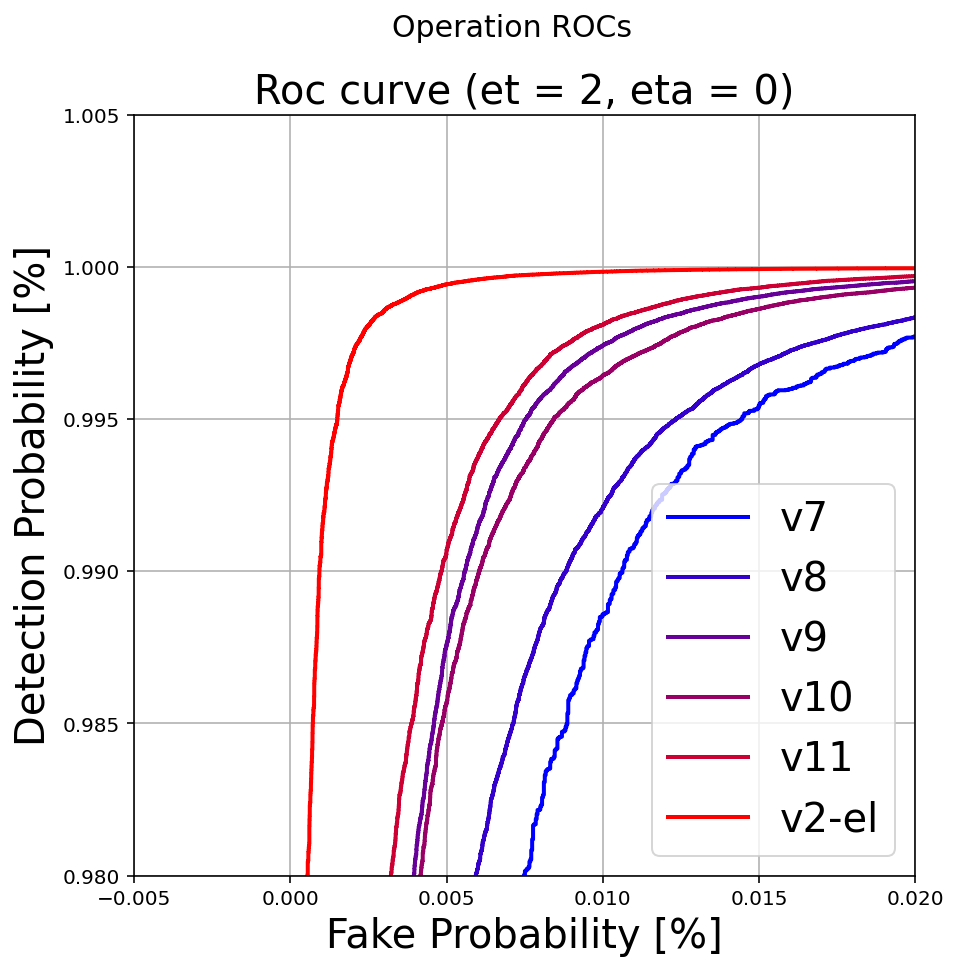

In [28]:
cv_v7.plot_roc_curves( best_sorts, ['v7', 'v8', 'v9', 'v10','v11','v2-el'], 
                        ['v7', 'v8', 'v9', 'v10','v11','v2-el'], 
                        'roc_v7_to_v2_el_et2_eta0.pdf', display=True, 
                        colors=get_color_fader('blue','red',6) ,
                        et_bin=2, eta_bin=0, xmin=-0.005, xmax=0.02, ymin=0.980, ymax=1.005, 
                        fontsize=20,
                        figsize=(7,7))

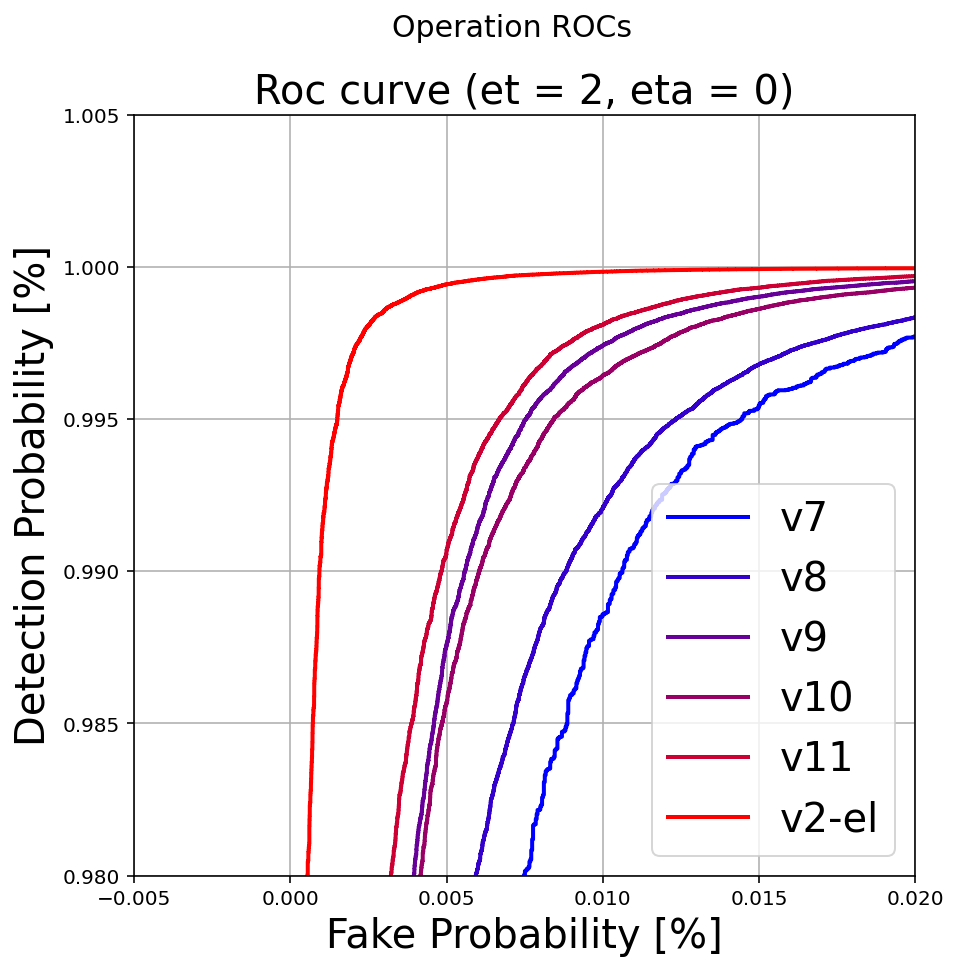

In [29]:
cv_v7.plot_roc_curves( best_sorts, ['v7', 'v8', 'v9','v10','v11','v2-el'], 
                        ['v7', 'v8', 'v9','v10','v11','v2-el'], 
                        'roc_v7_to_v2_el_et2_eta0.pdf', display=True, 
                        colors=get_color_fader('blue','red',6) ,
                        et_bin=2, eta_bin=0, xmin=-0.005, xmax=0.02, ymin=0.980, ymax=1.005, 
                        fontsize=20,
                        figsize=(7,7))

In [30]:
cv_v7.plot_roc_curves( best_sorts, ['v7', 'v8', 'v9','v10','v11','v2-el'], 
                       ['v7', 'v8', 'v9','v10','v11','v2-el'], 
                        'rocs_v7_to_v2_el.pdf',display=False, colors=get_color_fader('blue','red',6),
                       figsize=(30,30))